# Regression - FFNN

14 Dec 2019

Model 1 - mse 4.67 - First Model

Model 2 - mse 4.76 - Remove Flatten layer from model 1

Model 3 - mse 5.44 - Use different optimizer from model 1

Model 4 - mse 4.63 - Use test data as validation data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df['Sex'] = df['Sex'].replace(('I','M','F'),(0,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=7)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((3341, 8), (836, 8), (3341,), (836,))

In [2]:
X_tr = X_tr.astype('float32')
# X_tr.info()
y_tr = y_tr.astype('float32')
X_te = X_te.astype('float32')
y_te = y_te.astype('float32')

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

## model 1

First model

In [73]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1))

In [76]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [77]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 267us/sample - loss: 79.7283 - mse: 79.7283 - val_loss: 41.6198 - val_mse: 41.6198
Epoch 2/100
2672/2672 [==============================] - 0s 43us/sample - loss: 20.1482 - mse: 20.1482 - val_loss: 13.5718 - val_mse: 13.5718
Epoch 3/100
2672/2672 [==============================] - 0s 49us/sample - loss: 11.4089 - mse: 11.4089 - val_loss: 9.1048 - val_mse: 9.1048
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 9.0776 - mse: 9.0776 - val_loss: 7.4555 - val_mse: 7.4555
Epoch 5/100
2672/2672 [==============================] - 0s 62us/sample - loss: 7.9879 - mse: 7.9879 - val_loss: 6.5812 - val_mse: 6.5812
Epoch 6/100
2672/2672 [==============================] - 0s 47us/sample - loss: 7.2759 - mse: 7.2759 - val_loss: 6.1130 - val_mse: 6.1130
Epoch 7/100
2672/2672 [==============================] - 0s 41us/sample - loss: 6.8143 - mse: 6.8143 - val_loss: 5

In [78]:
y_pred = model.predict(X_te)

In [79]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [80]:
score

[4.671496309161757, 4.6714964]

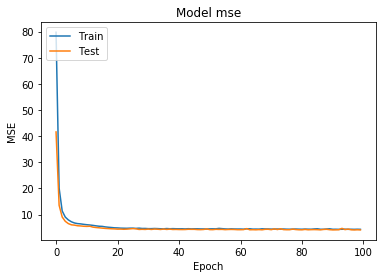

In [81]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 2

Remove Flatten

In [82]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [83]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [84]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 248us/sample - loss: 91.9383 - mse: 91.9383 - val_loss: 58.6622 - val_mse: 58.6622
Epoch 2/100
2672/2672 [==============================] - 0s 48us/sample - loss: 29.3412 - mse: 29.3412 - val_loss: 13.4319 - val_mse: 13.4319
Epoch 3/100
2672/2672 [==============================] - 0s 39us/sample - loss: 11.8317 - mse: 11.8317 - val_loss: 9.3785 - val_mse: 9.3785
Epoch 4/100
2672/2672 [==============================] - 0s 46us/sample - loss: 8.9401 - mse: 8.9401 - val_loss: 7.1965 - val_mse: 7.1965
Epoch 5/100
2672/2672 [==============================] - 0s 36us/sample - loss: 7.7218 - mse: 7.7218 - val_loss: 6.3351 - val_mse: 6.3351
Epoch 6/100
2672/2672 [==============================] - 0s 41us/sample - loss: 6.9780 - mse: 6.9780 - val_loss: 5.9475 - val_mse: 5.9475
Epoch 7/100
2672/2672 [==============================] - 0s 45us/sample - loss: 6.5784 - mse: 6.5784 - val_loss: 5

In [85]:
y_pred = model.predict(X_te)

In [86]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [87]:
score

[4.757182445252341, 4.757182]

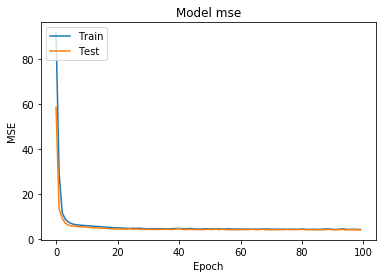

In [88]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 3

Different optimizer

In [89]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1))

In [90]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [91]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 315us/sample - loss: 30.7252 - mse: 30.7252 - val_loss: 7.0266 - val_mse: 7.0266
Epoch 2/100
2672/2672 [==============================] - 0s 42us/sample - loss: 12.2341 - mse: 12.2341 - val_loss: 8.3313 - val_mse: 8.3313
Epoch 3/100
2672/2672 [==============================] - 0s 48us/sample - loss: 10.3394 - mse: 10.3394 - val_loss: 6.2316 - val_mse: 6.2316
Epoch 4/100
2672/2672 [==============================] - 0s 43us/sample - loss: 7.7205 - mse: 7.7205 - val_loss: 6.0068 - val_mse: 6.0068
Epoch 5/100
2672/2672 [==============================] - 0s 38us/sample - loss: 8.2209 - mse: 8.2209 - val_loss: 8.3187 - val_mse: 8.3187
Epoch 6/100
2672/2672 [==============================] - 0s 32us/sample - loss: 7.8461 - mse: 7.8461 - val_loss: 7.1159 - val_mse: 7.1159
Epoch 7/100
2672/2672 [==============================] - 0s 45us/sample - loss: 7.8307 - mse: 7.8307 - val_loss: 6.449

In [92]:
y_pred = model.predict(X_te)

In [93]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [94]:
score

[5.438513148914684, 5.4385133]

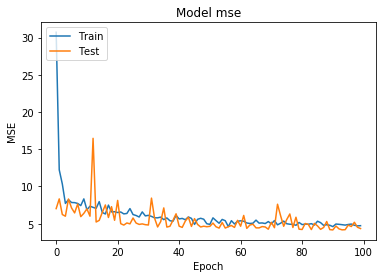

In [95]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## model 4

using test data as validation data

In [4]:
model = Sequential()
model.add(Dense(32, input_shape=(8,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(1))

In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [6]:
epochs = 100
batch_size=128

history = model.fit(X_tr, y_tr, epochs=epochs, batch_size=batch_size, validation_data=[X_te,y_te])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 371us/sample - loss: 74.5925 - mse: 74.5925 - val_loss: 28.6562 - val_mse: 28.6562
Epoch 2/100
3341/3341 [==============================] - 0s 48us/sample - loss: 13.4662 - mse: 13.4662 - val_loss: 10.1208 - val_mse: 10.1208
Epoch 3/100
3341/3341 [==============================] - 0s 47us/sample - loss: 8.5473 - mse: 8.5473 - val_loss: 8.1832 - val_mse: 8.1832
Epoch 4/100
3341/3341 [==============================] - 0s 47us/sample - loss: 7.1590 - mse: 7.1590 - val_loss: 7.3943 - val_mse: 7.3943
Epoch 5/100
3341/3341 [==============================] - 0s 45us/sample - loss: 6.8272 - mse: 6.8272 - val_loss: 7.2693 - val_mse: 7.2693
Epoch 6/100
3341/3341 [==============================] - 0s 45us/sample - loss: 6.6293 - mse: 6.6293 - val_loss: 7.1623 - val_mse: 7.1622
Epoch 7/100
3341/3341 [==============================] - 0s 44us/sample - loss: 6.4530 - mse: 6.4530 - val_loss: 7.1

In [7]:
y_pred = model.predict(X_te)

In [8]:
score = model.evaluate(X_te, y_te, batch_size=128)

836/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [9]:
score

[4.626487259659471, 4.6264873]

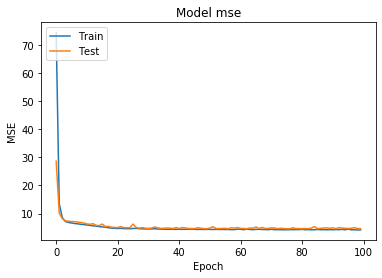

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model mse')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()